# EnsembleTechniques | Project 1 | Parkinson's Disease

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.


Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

## About Dataset
This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column.For further information or to pass on comments

## Attribute Information

### Matrix column entries (attributes):
###### name - ASCII subject name and recording number
###### MDVP:Fo(Hz) - Average vocal fundamental frequency
###### MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
###### MDVP:Flo(Hz) - Minimum vocal fundamental frequency
###### MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
###### MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
###### NHR,HNR - Two measures of ratio of noise to tonal components in the voice
###### status - Health status of the subject (one) - Parkinson's, (zero) - healthy
###### RPDE,D2 - Two nonlinear dynamical complexity measures
###### DFA - Signal fractal scaling exponent
###### spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

## Importing key modules

In [1]:
# Import Basic Libraries
import numpy as np
import pandas as pd

# Import Datavisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set Theme for Data Visualization
%matplotlib inline
sns.set_style('whitegrid')

# Mitigating Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Libraries for Statistical Analysis
import scipy.stats as stats

# Import Libraries for Classification Model Building
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classfier
from sklearn.ensemble import BaggingClassifier #Bagging Classifier
from sklearn.ensemble import AdaBoostClassifier #AdaBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier #GradientBoost Classifier
from sklearn.ensemble import RandomForestClassifier #RandomForest Classifier

# Import Libraries for Train-Test split, Scaling and Metric calculation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Identification of Optimum vales for Hyperparameters for Model Tuning
from sklearn.model_selection import GridSearchCV

# Set Options for Tabular Output
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

## #1 Load the dataset

Nomenclature: parkd-> Dataset of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD) 

In [2]:
# Importing dataset directly from table on website

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
parkd = pd.read_csv(url)
parkd.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
#Shape of Parkinson's Dataset
print("Number of Rows:",parkd.shape[0],"\n")
print("Number of Columns:",parkd.shape[1])

Number of Rows: 195 

Number of Columns: 24


## Data Pre - Processing

In [4]:
# 1 Cleaning any leading/trailing whitespace in the column header
parkd.columns = [x.strip() for x in parkd.columns]
parkd.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

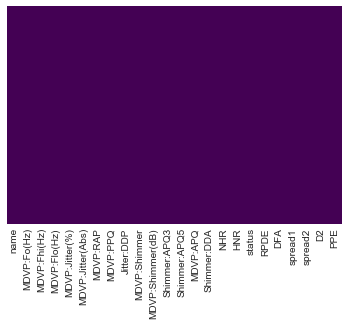

In [5]:
# 2 Missing Value through data visualization
sns.heatmap(parkd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

All datapoints available in the dataset

In [6]:
# 3 Checking for data pollution:
parkd[~parkd[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']].applymap(np.isreal).all(1)]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


Quality of data in numeric columns is good and doesn't contain any object type value

## #2  Eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes etc

In [7]:
# Exporting Dataset to CSV Format for eye-balling
parkd.to_csv('Parkinson Disease Data.csv',sep=',')

#### Observation through eye-balling the dataset
In the given dataset there are 24 attributes, each related to a range of biomedical voice measurement. Each column in the datase is a voice measure for 195 corresponding voice recording except the first column which is a reference id to the person. The "status" column is the dependent variable whereas the 22 metrics related biomedical voice measurements will act as plausible Independent variables. One point to be noted in the dataset is that the measurement scale varies for attributes so we need to be cautious while using algorithms based on distance calculations.

##### No irregularities related to illogical data entry identified through eye-balling

In [8]:
# Datatype of attributes
parkd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

## #3 Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?

### Univariate Analysis

In [9]:
#1 Overall Descriptive Statistics
round(parkd.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.23,41.39,88.33,117.57,148.79,182.77,260.10
MDVP:Fhi(Hz),195.0,197.10,91.49,102.14,134.86,175.83,224.21,592.03
MDVP:Flo(Hz),195.0,116.32,43.52,65.48,84.29,104.32,140.02,239.17
MDVP:Jitter(%),195.0,0.01,0.00,0.00,0.00,0.00,0.01,0.03
MDVP:Jitter(Abs),195.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
MDVP:RAP,195.0,0.00,0.00,0.00,0.00,0.00,0.00,0.02
MDVP:PPQ,195.0,0.00,0.00,0.00,0.00,0.00,0.00,0.02
Jitter:DDP,195.0,0.01,0.01,0.00,0.00,0.01,0.01,0.06
MDVP:Shimmer,195.0,0.03,0.02,0.01,0.02,0.02,0.04,0.12
MDVP:Shimmer(dB),195.0,0.28,0.19,0.08,0.15,0.22,0.35,1.30


In [10]:
#2 Skewness and Kurtosis in attributes

#2.1 Skewness
parkd.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [11]:
#2.2 Kurtosis
parkd.kurtosis()

MDVP:Fo(Hz)        -0.627898 
MDVP:Fhi(Hz)        7.627241 
MDVP:Flo(Hz)        0.654615 
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer        3.238308 
MDVP:Shimmer(dB)    5.128193 
Shimmer:APQ3        2.720152 
Shimmer:APQ5        3.874210 
MDVP:APQ            11.163288
Shimmer:DDA         2.720661 
NHR                 21.994974
HNR                 0.616036 
status             -0.595518 
RPDE               -0.921781 
DFA                -0.686152 
spread1            -0.050199 
spread2            -0.083023 
D2                  0.220334 
PPE                 0.528335 
dtype: float64

Insights: There is skewness in the independent variables. The attributes such HNR i.e. ratio of noise to tonal components in the voice, RPDE i.e. nonlinear dynamical complexity measures and DFA ie. Signal fractal scaling exponent shows negative skewness whereas other attributes show a positive skewness.

### Bivariate Analysis

1. Bivariate analysis for mean, standard deviation and Median of attributes for patients with PD vs Healthy Patients

In [12]:
#1.1 Data Distribution of 'status' across all variables
parkd.groupby(["status"]).count()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147


In [13]:
#1.2 Mean Distribution of 'status' across all variables
round(parkd.groupby(["status"]).mean(),2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.94,223.64,145.21,0.00,0.0,0.0,0.0,0.01,0.02,0.16,0.01,0.01,0.01,0.03,0.01,24.68,0.44,0.70,-6.76,0.16,2.15,0.12
1,145.18,188.44,106.89,0.01,0.0,0.0,0.0,0.01,0.03,0.32,0.02,0.02,0.03,0.05,0.03,20.97,0.52,0.73,-5.33,0.25,2.46,0.23


In [14]:
#1.3 Standard Deviation of 'status' across all variables
round(parkd.groupby(["status"]).std(),2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,52.73,96.73,58.76,0.00,0.0,0.0,0.0,0.00,0.01,0.06,0.00,0.00,0.00,0.01,0.02,3.43,0.09,0.05,0.64,0.06,0.31,0.04
1,32.35,88.34,32.27,0.01,0.0,0.0,0.0,0.01,0.02,0.21,0.01,0.01,0.02,0.03,0.04,4.34,0.10,0.05,0.97,0.08,0.38,0.08


In [15]:
#1.4 Median Distribution of 'status' across all variables
round(parkd.groupby(["status"]).median(),2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,199.00,231.16,113.94,0.00,0.0,0.0,0.0,0.00,0.02,0.15,0.01,0.01,0.01,0.03,0.00,25.00,0.44,0.68,-6.83,0.17,2.13,0.12
1,145.17,163.34,99.77,0.01,0.0,0.0,0.0,0.01,0.03,0.26,0.01,0.02,0.02,0.04,0.02,21.41,0.53,0.73,-5.44,0.24,2.44,0.22


Insights: The Mean, Standard Deviation and Median of attributes related to Vocal Fundamental Frequency i.e. MVDP:Fo(Hz), MVDP:Fhi(Hz) and MVDP:Flo(Hz) for parkinson's patients > healthy person, whereas for attributes related to several measure of amplitude (shimmer), nonlinear dynamical complexity measures (RPDE & D2), Signal fractal scaling exponent(DFA) and nonlinear measures of fundamental frequency variation (spread1,spread2,PPE) - the Mean, SD, and Median for parkinson's patient < healthy person.

2. Pairplot Analysis

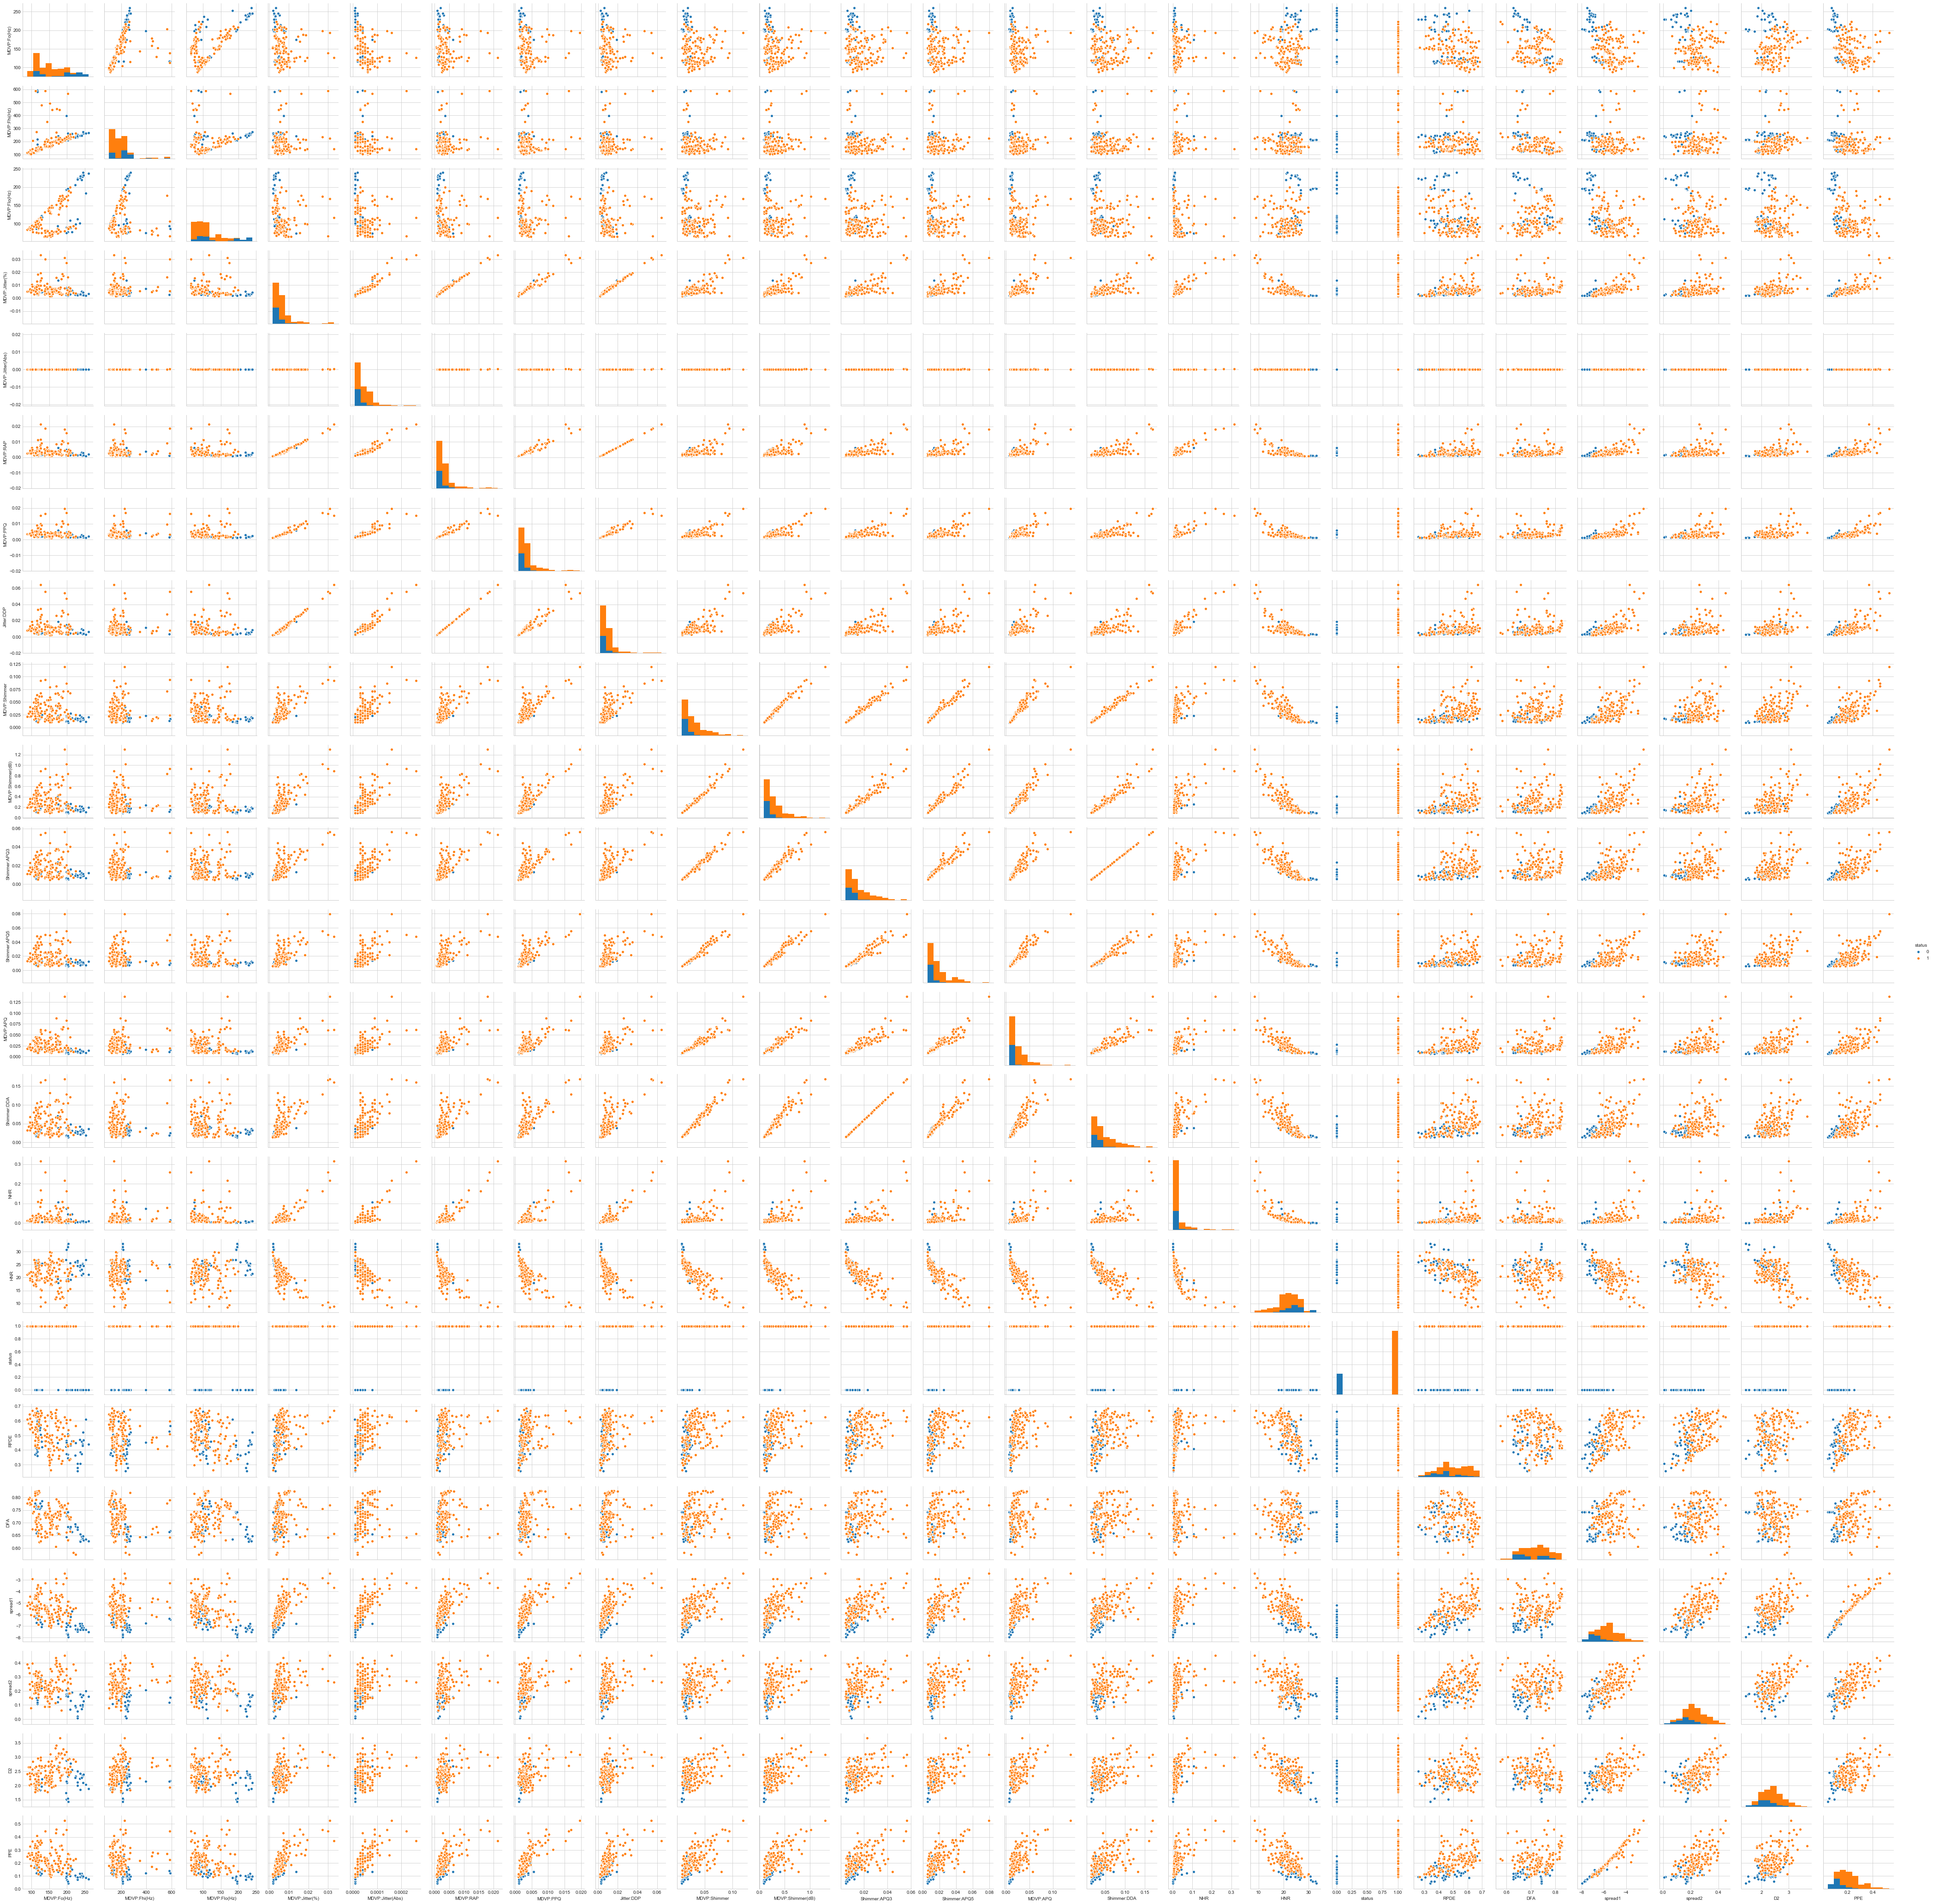

In [16]:
sns.pairplot(parkd,hue='status')

Insights: We can see that attributes related to vocal fundamental frequency, measures of ratio of noise to tonal components in the voice, nonlinear dynamical complexity measures, Signal fractal scaling exponent and nonlinear measures of fundamental frequency variation looks to be normally distributed. Rest looks to follow exponential distribution.

Also, if we see the hue the classes of parkinson's patients vs healthy person are though overlapped but looks to be spread, hence we can say that the attributes are weak to mediocre predictors for the disease. More on this can studied through correlation analysis.

3. Correlation Plot and Tabular Output

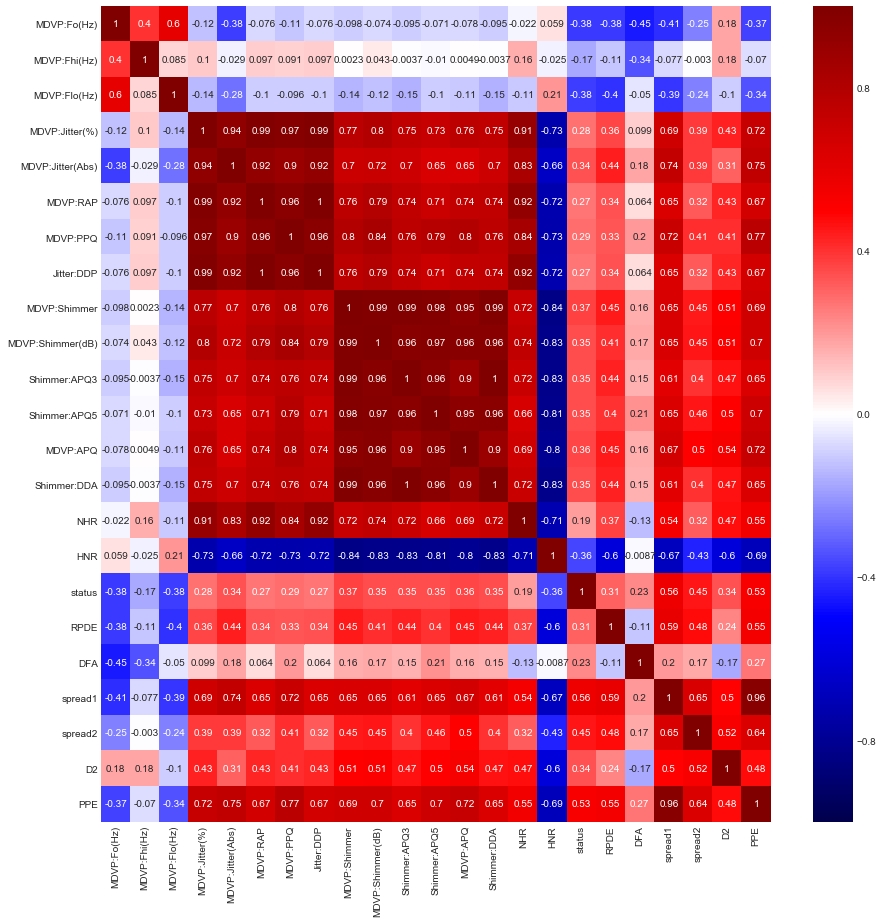

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(parkd.corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

Insights: In our case the 'status' is the DV whereas other attributes are IV. Now, the correlation between the DV and IV ranges between -0.36 to 0.56 and for none of the IV the correlation value is in between -0.10 to 0.10 (weak correlation) which suggest that moderate correlation is present between the DV and IVs.

Also, There are group of attributes which are highly correlated. For instance, measures of variation in fundamental frequency (MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP) are highly correlated among themselves. Similarly, measures of variation in amplitude (MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA ) are too highly correlated among themselves

4. Boxplot for Identification of Outliers

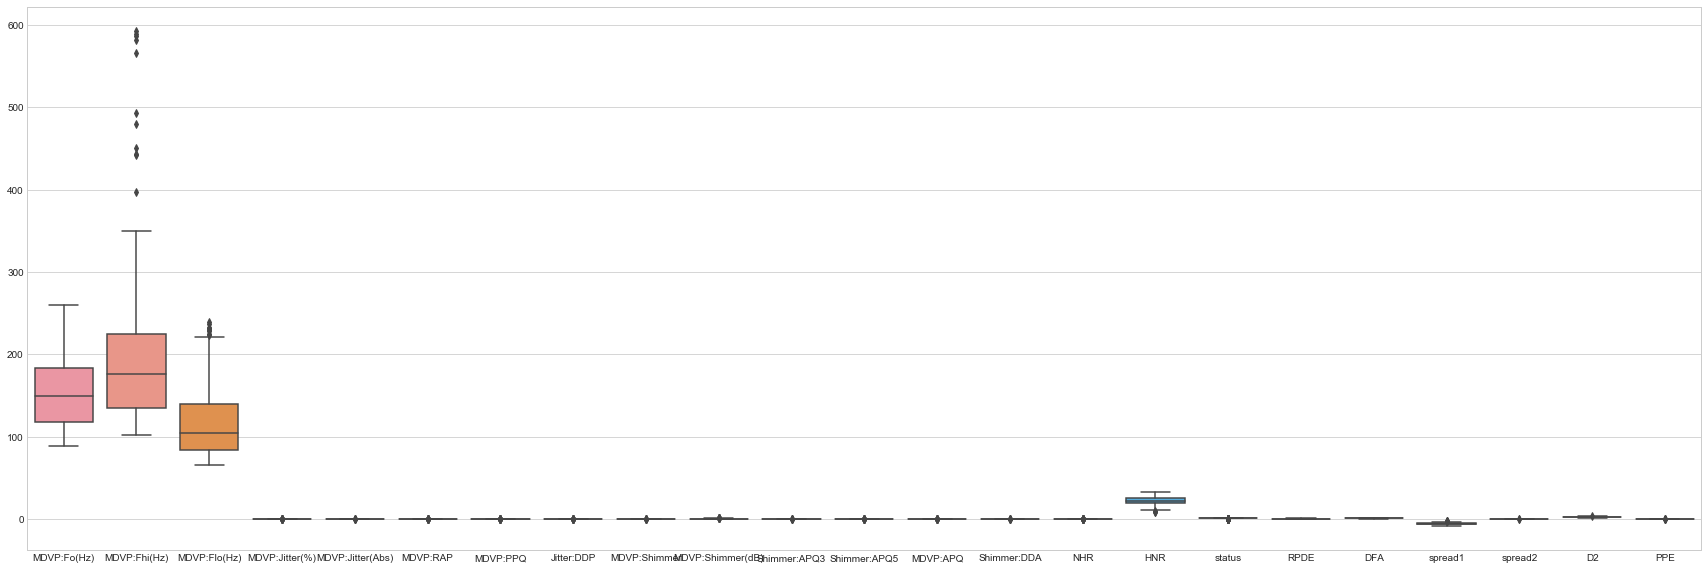

In [18]:
# BOXPLOT to see if their are any outliers in the attributes given in dataset
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.boxplot(data = parkd)

#### Insights:
Through Boxplot Outliers identified esp. in case of Maximum vocal fundamental frequency (MDVP:Fhi(Hz)) and Minimum vocal fundamental frequency (MDVP:Flo(Hz)). Since, the scale of attributes are at different level, presence of outliers cannot be determined in other attributes through Boxplot.

#### Plan of Action:
For this given case we can see that higher values of the attributes are mostly related to parkinson's disease patients, hence, I'm preserving these for modeling 

## #4 Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

In [19]:
parkd.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [20]:
# Dependent Variable
Y = parkd['status']

# Independent Variable
X = parkd[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR','RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]

print("Shape of Dependent Variable:\n", Y.shape,"\n")
print("Shape of Independent Variable:\n", X.shape)

Shape of Dependent Variable:
 (195,) 

Shape of Independent Variable:
 (195, 22)


Splitting dataset into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables

In [21]:
# Dividing the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
# random state is setting up a seed value

# Shape of training and tst feature set
print("Shape of X Train:\t",X_train.shape)
print("Shape of X Test:\t",X_test.shape)
print("Shape of Y Train:\t",Y_train.shape)
print("Shape of Y Test:\t",Y_test.shape)

Shape of X Train:	 (136, 22)
Shape of X Test:	 (59, 22)
Shape of Y Train:	 (136,)
Shape of Y Test:	 (59,)


## #5 Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [22]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Model building on training dataset
dt_model.fit(X_train, Y_train)

# Prediction
dt_predict = dt_model.predict(X_test)

## #6 Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. 

In [23]:
# Accuracy of Model
print("Accuracy on Training Set with Decision Tree:",dt_model.score(X_train,Y_train))
print("Accuracy on Testing Set with Decision Tree:",dt_model.score(X_test,Y_test))

# Confusion Matrix for Decision Tree Classification Model
pd.DataFrame(metrics.confusion_matrix(Y_test, dt_predict))

Accuracy on Training Set with Decision Tree: 1.0
Accuracy on Testing Set with Decision Tree: 0.7457627118644068


,0,1
0,7,5
1,10,37


## #7 Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

Using GridSearchCV for identification of optimum value of regularization parameters i.e. max_depth and min_sample_leaf

Iteration 1: Identification of regularization parameter wide range

In [24]:
# Setting up the parameter grid
parameters1 = [{'max_depth':[5,10,15]},
               {'min_samples_leaf':[1,2,3,4,5]}]

In [25]:
# Grid Search Decision Tree
grid_search1 = GridSearchCV(estimator = dt_model, param_grid = parameters1, scoring = 'accuracy', cv = 10, n_jobs = -1)

# Model building on training dataset
grid_search1.fit(X,Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'max_depth': [5, 10, 15]}, {'min_samples_leaf': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [26]:
# Print Best accuracy and  Best Parameters
print("Best Accuracy:",grid_search1.best_score_)
print("Best Paramters:", grid_search1.best_params_)

Best Accuracy: 0.8153846153846154
Best Paramters: {'max_depth': 5}


Insight: For 10 K-folds we're getting an accuracy of 81.53% with best parameter 'max_depth':5 but nothing is suggested for min_sample_leaf. Since, in this scenario the 'max_depth' range is quiet wide in iteration 2 I'll narrow down this range and than try to identify the best value for regularization parameter around 5

Iteration 2: Identification of regularization parameters with closed range

In [27]:
# Setting up the parameter grid
parameters2 = [{'max_depth':[1,2,3,4,5,6,7,8,9]},
               {'min_samples_leaf':[1,2,3,4,5]}]

In [28]:
# Grid Search Decision Tree
grid_search2 = GridSearchCV(estimator = dt_model, param_grid = parameters2, scoring = 'accuracy', cv = 10, n_jobs = -1)

# Model building on training dataset
grid_search2.fit(X,Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}, {'min_samples_leaf': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [29]:
# Print Best accuracy and  Best Parameters
print("Best Accuracy:",grid_search2.best_score_)
print("Best Paramters:", grid_search2.best_params_)

Best Accuracy: 0.8307692307692308
Best Paramters: {'max_depth': 4}


Insight: After performing the grid search on narrow range of entries for max_depth - best parameter = 4. The best accuaracy level achieved for kfolds = 10 is 83%. Nothing can be said in case of min_sample_leaf so I'm going to pursue the manual approach and will develop models at min_sample_leaf = {1,2} and check the accuracy levels

In [30]:
# Grid Search Prediction
grid_predict = grid_search2.predict(X_test)

# Confusion Matrix for Decision Tree Classification Model
pd.DataFrame(metrics.confusion_matrix(Y_test, grid_predict))

,0,1
0,9,3
1,0,47


#### #1 Decision Tree Model with 'max_depth': 4 and 'min_samples_leaf': 1

In [31]:
# Decision Tree Classifier
dt_model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 1, random_state = 0)

# Model building on training dataset
dt_model1.fit(X_train, Y_train)

# Prediction
dt_predict1 = dt_model1.predict(X_test)

# Accuracy of Model
print("Accuracy on Training Set with Decision Tree ('max_depth': 4 and 'min_samples_leaf': 1) =",dt_model1.score(X_train,Y_train))
print("Accuracy on Testing Set with Decision Tree ('max_depth': 4 and 'min_samples_leaf': 1) =",dt_model1.score(X_test,Y_test))

# Confusion Matrix for Decision Tree Classification Model
pd.DataFrame(metrics.confusion_matrix(Y_test, dt_predict1))

Accuracy on Training Set with Decision Tree ('max_depth': 4 and 'min_samples_leaf': 1) = 0.9558823529411765
Accuracy on Testing Set with Decision Tree ('max_depth': 4 and 'min_samples_leaf': 1) = 0.711864406779661


,0,1
0,7,5
1,12,35


#### #2 Decision Tree Model with 'max_depth': 4 and 'min_samples_leaf': 2

In [32]:
# Decision Tree Classifier
dt_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 2, random_state = 0)

# Model building on training dataset
dt_model2.fit(X_train, Y_train)

# Prediction
dt_predict2 = dt_model2.predict(X_test)

# Accuracy of Model
print("Accuracy on Training Set with Decision Tree ('max_depth': 4 and 'min_samples_leaf': 2) =",dt_model2.score(X_train,Y_train))
print("Accuracy on Testing Set with Decision Tree ('max_depth': 4 and 'min_samples_leaf': 2) =",dt_model2.score(X_test,Y_test))

# Confusion Matrix for Decision Tree Classification Model
pd.DataFrame(metrics.confusion_matrix(Y_test, dt_predict2))

Accuracy on Training Set with Decision Tree ('max_depth': 4 and 'min_samples_leaf': 2) = 0.9558823529411765
Accuracy on Testing Set with Decision Tree ('max_depth': 4 and 'min_samples_leaf': 2) = 0.711864406779661


,0,1
0,7,5
1,12,35


### #7.1 What is impact of regularization on Accuracy of Model?
As, we're aware of the fact that decision trees are prone to overfitting and underfitting, same is the case here in parkinson's case study. When I developed the model without any regularization of tree, the accuracy on training set is = 100% whereas, accuracy for testing set = 74.57%. 100% accuracy level on training set suggests somewhere the model is overfit. To mitigate overfitting of the model I introduced 2 regularization parameters (max_depth and min_samples_leaf)
##### 'max_depth' indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data.
##### 'min_samples_leaf' is The minimum number of samples required to be at a leaf node.
I used the grid search methodology to identify the best value for these parameters. I'm getting an accuracy level of 83% for kfolds = 10 when 'max_depth' = 4. Unfortunately, the grid search was unable to identify best value for 'min_samples_leaf'. To identify the value of 'min_samples_leaf' we rebuilt the decision tree model at {1,2}, the output was same in both the cases.

After intrducing the regularization parameter i.e. max_depth = 4 and min_samples_leaf = 1, the training accuracy reduced to 95.58%, suggesting that some levels of overfitting is reduced but at the time accuracy in this testing data too reduced to 71.18%. Though if we consider the accuracy level from grid_search at kfolds = 10 we can say that our model's best accuracy is 83.07% after introducing the regularization parameters.

### #7.2 How regularization helps?
In decision trees if a decision tree is fully grown, it may lose some generalization capability. This is a phenomenon known as overfitting. Also, if a decision tree cannot capture the underlying trend of the data then its a case of underfitting. The regularization parameters help us in builiding a desicion tree model which is neither underfit not overfit. For instance, 'max_depth' controls the depth of the tree as at large depth values, models tend to overfit. Similarly, parameters like 'min_samples_split' control the minimum number of samples required to split internal node and 'min_samples_leaf' control the minimum number of samples required to be at leaf node. Both these parametrs assist in mitigating the risk of underfitting in a decision tree.

## Implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? 

Random Forest Classifier using default settings

In [33]:
# Random Forest Classifier
rfcl = RandomForestClassifier(random_state = 10)

# Model building on training dataset
rfcl.fit(X_train, Y_train)

# Prediction
rfcl_predict = rfcl.predict(X_test)

In [34]:
# Accuracy of Model
print("Accuracy on Training Set with Random forest:",rfcl.score(X_train,Y_train))
print("Accuracy on Testing Set with Random forest:",rfcl.score(X_test,Y_test))

# Confusion Matrix for Random Forest
pd.DataFrame(metrics.confusion_matrix(Y_test,rfcl_predict))

Accuracy on Training Set with Random forest: 1.0
Accuracy on Testing Set with Random forest: 0.864406779661017


,0,1
0,9,3
1,5,42


Insight: Though we're able to achieve 86.44% of accuracy in testing set but in training set we heve high levels of accuracy (~100%) which suggest case of overfitting.

Using GridSearchCV to identify optimum value for number of trees to regularize the randomforest model

Iteration 1: Using wide range of values for number of trees

In [35]:
# Setting up the parameter grid
rf_parameters1 = [{'n_estimators':[50,100,150,200,250,300]}]

In [36]:
# Grid Search Decision Tree
rf_grid_search1 = GridSearchCV(estimator = rfcl, param_grid = rf_parameters1, scoring = 'accuracy', cv = 10, n_jobs = -1)

# Model building on training dataset
rf_grid_search1.fit(X,Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [50, 100, 150, 200, 250, 300]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
# Print Best accuracy and  Best Parameters
print("Best Accuracy:",rf_grid_search1.best_score_)
print("Best Paramters:", rf_grid_search1.best_params_)

Best Accuracy: 0.8564102564102564
Best Paramters: {'n_estimators': 50}


Insight: After performing GridSearchCV for a wide range of 'n_estimators' it's identified that optimal number of trees = 50 and for kfold = 10 it gives best accuracy of 85.64%. In iteration 2, I'll narrow down the values for 'n_estimator' to identify optimal value for number of trees

Iteration 2: Using narrower range near to 50 to identify best value for 'n_estimator'

In [38]:
# Setting up the parameter grid
rf_parameters2 = [{'n_estimators':[20,30,40,50,60,70,80,90]}]

In [39]:
# Grid Search Decision Tree
rf_grid_search2 = GridSearchCV(estimator = rfcl, param_grid = rf_parameters2, scoring = 'accuracy', cv = 10, n_jobs = -1)

# Model building on training dataset
rf_grid_search2.fit(X,Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
# Print Best accuracy and  Best Parameters
print("Best Accuracy:",rf_grid_search2.best_score_)
print("Best Paramters:", rf_grid_search2.best_params_)

Best Accuracy: 0.8564102564102564
Best Paramters: {'n_estimators': 50}


Insight: Again, the optimal value of number of trees = 50 

Iteration 3: Further narrow downing the experiment. Identifying number of trees at 45, 50, 55

In [41]:
# Setting up the parameter grid
rf_parameters3 = [{'n_estimators':[45,50,55]}]

In [42]:
# Grid Search Decision Tree
rf_grid_search3 = GridSearchCV(estimator = rfcl, param_grid = rf_parameters3, scoring = 'accuracy', cv = 10, n_jobs = -1)

# Model building on training dataset
rf_grid_search3.fit(X,Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [45, 50, 55]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
# Print Best accuracy and  Best Parameters
print("Best Accuracy:",rf_grid_search3.best_score_)
print("Best Paramters:", rf_grid_search3.best_params_)

Best Accuracy: 0.8615384615384616
Best Paramters: {'n_estimators': 55}


Insights: When narrowed down to values around 50, identified that 'n_estimator' = 55 is the optimal value of number of trees which produces best accuracy of 86.15% for kfold = 10. We can further narrow down and identify optimal value of 'n_estimators' between 51 - 59

Iteration 4: 'n_estimator' optimal value between 51 - 59

In [44]:
# Setting up the parameter grid
rf_parameters4 = [{'n_estimators':[51,52,53,54,55,56,57,58,59]}]

In [45]:
# Grid Search Decision Tree
rf_grid_search4 = GridSearchCV(estimator = rfcl, param_grid = rf_parameters4, scoring = 'accuracy', cv = 10, n_jobs = -1)

# Model building on training dataset
rf_grid_search4.fit(X,Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [51, 52, 53, 54, 55, 56, 57, 58, 59]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
# Print Best accuracy and  Best Parameters
print("Best Accuracy:",rf_grid_search4.best_score_)
print("Best Paramters:", rf_grid_search4.best_params_)

Best Accuracy: 0.8615384615384616
Best Paramters: {'n_estimators': 52}


Insights: So 'n_estimator' = 52 looks to be optimal number of trees in random forest and this produces an accuracy of 86.154% for kfold = 10

Using 'n_estimator' = 52 in our base random forest model

In [47]:
# Random Forest Classifier
reg_rfcl = RandomForestClassifier(n_estimators = 52, random_state = 10)

# Model building on training dataset
reg_rfcl.fit(X_train, Y_train)

# Prediction
reg_rfcl_predict = reg_rfcl.predict(X_test)

In [48]:
# Accuracy of Model
print("Accuracy on Training Set with Random forest:",rfcl.score(X_train,Y_train))
print("Accuracy on Testing Set with Random forest:",rfcl.score(X_test,Y_test))

# Confusion Matrix for Random Forest
pd.DataFrame(metrics.confusion_matrix(Y_test,rfcl_predict))

Accuracy on Training Set with Random forest: 1.0
Accuracy on Testing Set with Random forest: 0.864406779661017


,0,1
0,9,3
1,5,42
